In [1]:
# import libs
import polars as pl
import pandas as pd
import numpy as np

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

# yellow brick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer

# models
import umap
import umap.plot

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/thomson/DS3000Project/venv/lib/python3.13/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/home/thomson/DS3000Project/venv/lib/python3.13/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/home/thomson/DS3000Project/venv/lib/python3.13/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  wa

In [2]:
#testing code with separate csv file
df = pl.read_csv("clustering.csv")
length = len(df)
percent = length*0.2 # doing clustering with more data  

df_10 = df.sample(n=percent, seed = 2025)

df_pd = df_10.to_pandas()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_10)

## Clustering and Dimensionality Reduction

### b. KMeans clustering

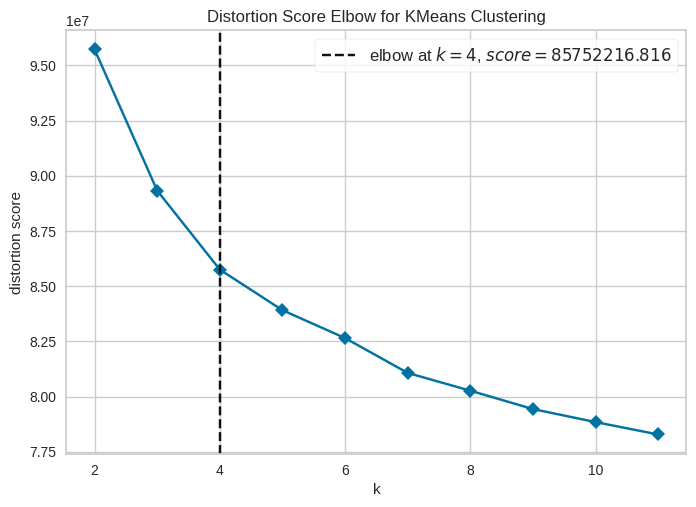

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
## Finding ideal number of clusters using Elbow Method

#initializing KClusterer
KClusterer = KMeans(random_state = 2025)

#visualizer to see KElbow
visualizer = KElbowVisualizer(KClusterer,
                              k=(2,12),
                              locate_elbow=True,
                              timings=False
                             )

#fitting the visualizer and displaying
visualizer.fit(df_scaled)
visualizer.show()

The silhouette score for K-means with 3 clusters is 0.482


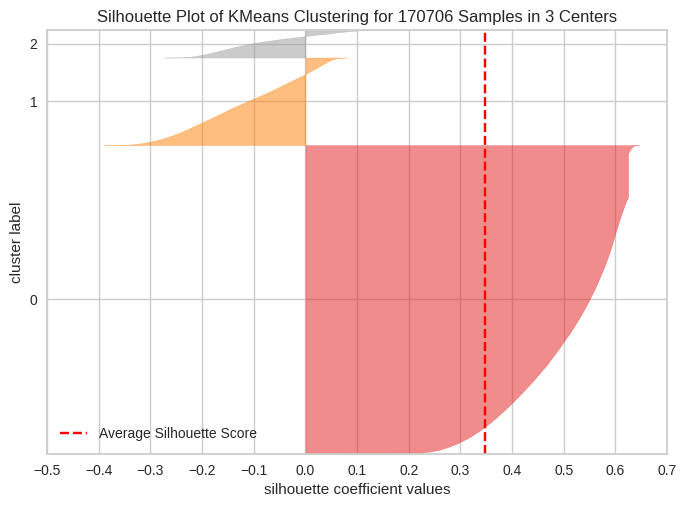

The silhouette score for K-means with 4 clusters is 0.373


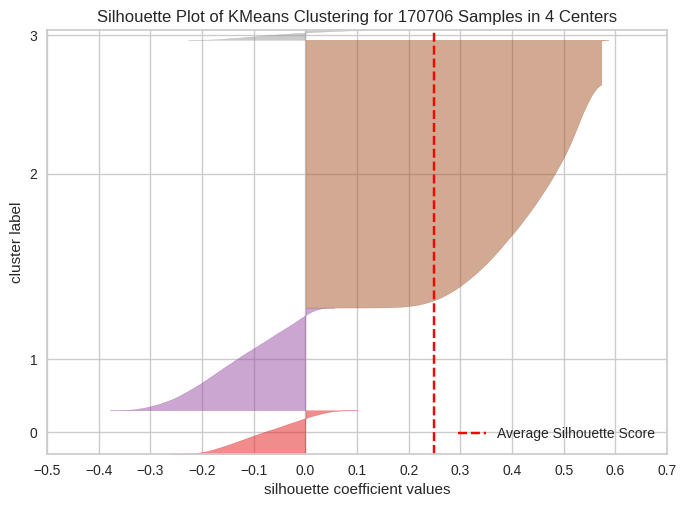

The silhouette score for K-means with 5 clusters is 0.372


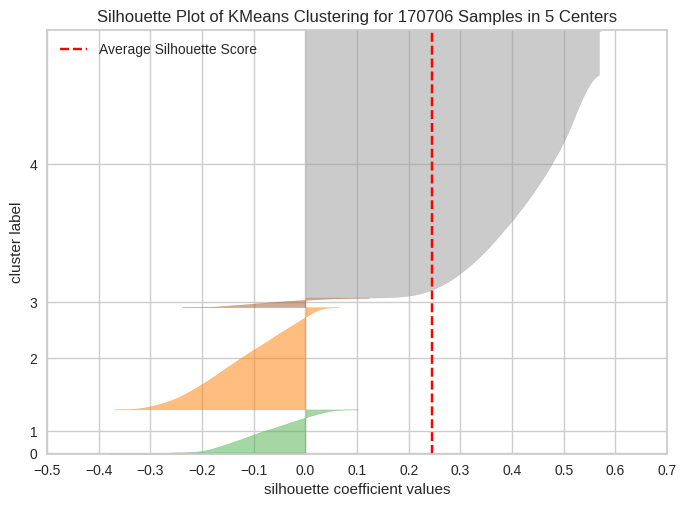

The silhouette score for K-means with 6 clusters is 0.231


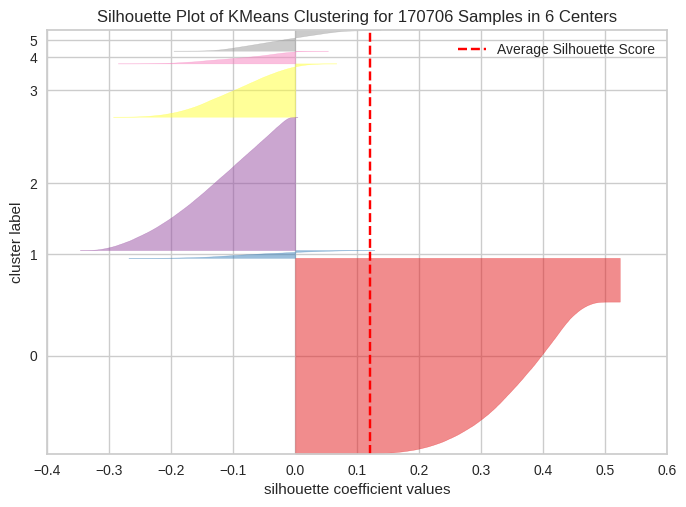

The silhouette score for K-means with 7 clusters is 0.186


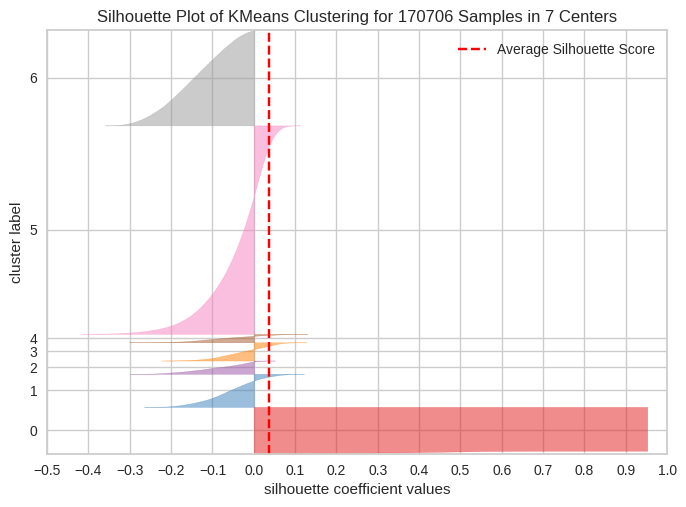

The silhouette score for K-means with 8 clusters is 0.173


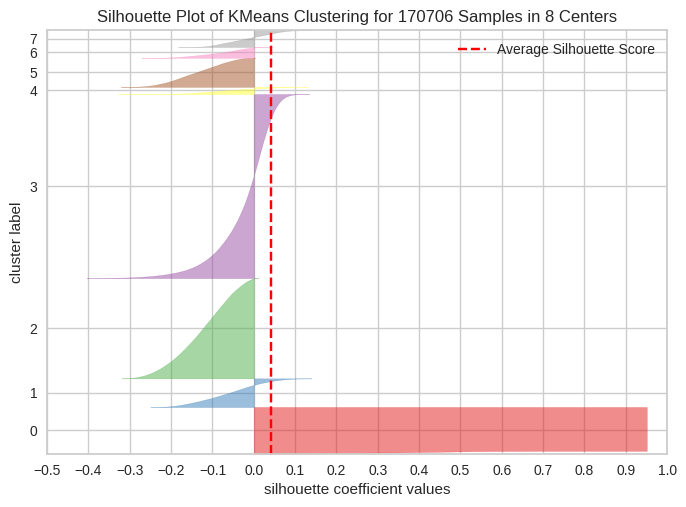

The silhouette score for K-means with 9 clusters is 0.171


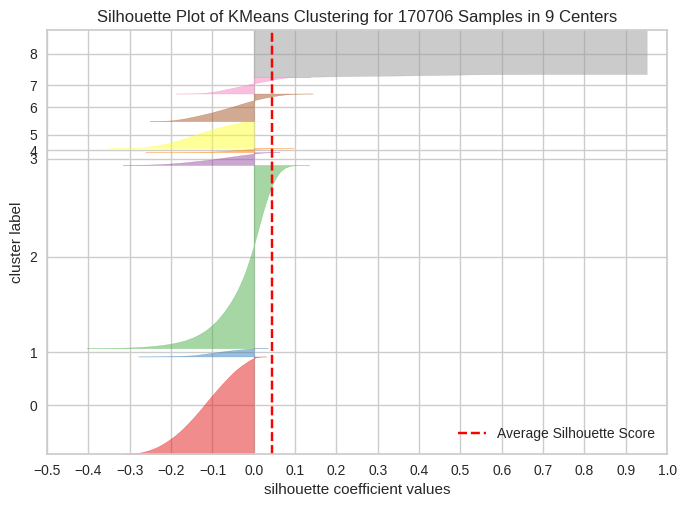

The silhouette score for K-means with 10 clusters is 0.163


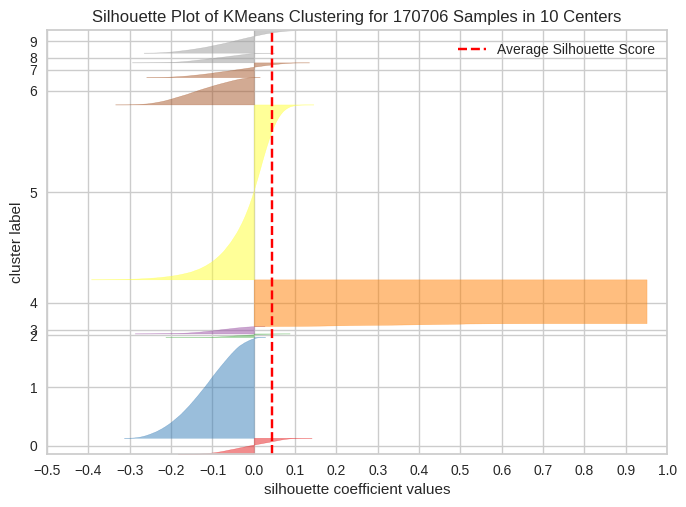

The silhouette score for K-means with 11 clusters is 0.083


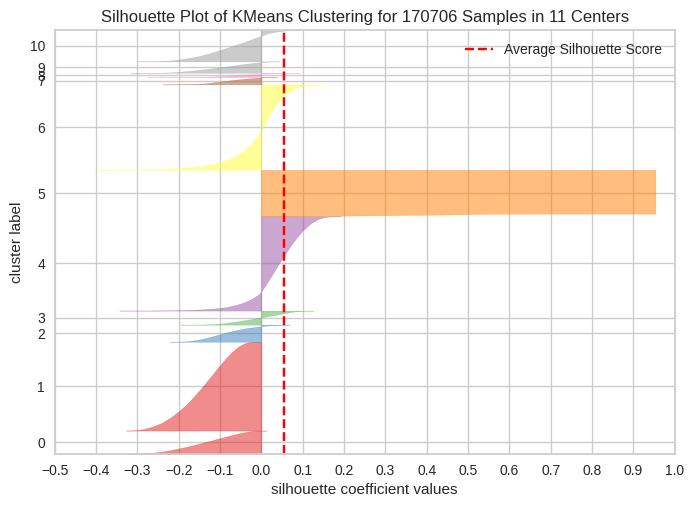

The silhouette score for K-means with 12 clusters is 0.159


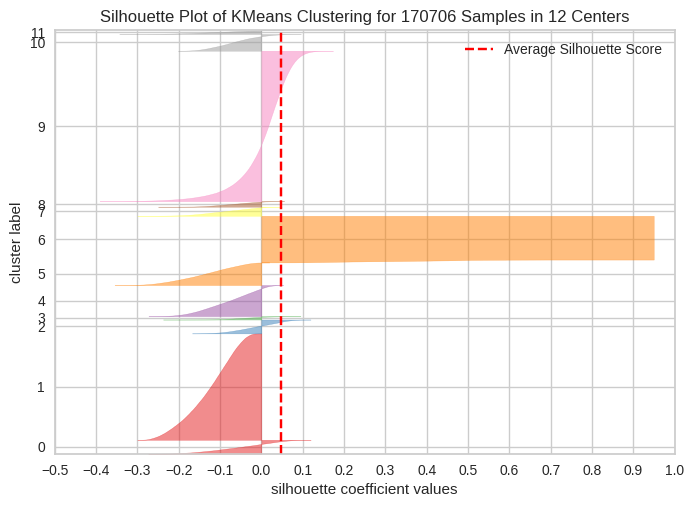

In [4]:
## Finding ideal number of clusters using Silhouette Method

#for loop to get silhouette score of 3-8 clusters
for i in range(3, 13): # silhouette score from 3 to 12 
  kmeans_pipe = Pipeline([ # # creating pipeline
    ('scale', StandardScaler()),
    ('aggcl', KMeans(n_clusters=i))
  ])

  #fitting pipe
  kmeans_pipe.fit(df_10)
  df_pd['cluster_label_scaled'] = kmeans_pipe.predict(df_10)

  #getting silhouette score
  kmeans_sil_avg = silhouette_score(df_10, df_pd['cluster_label_scaled'])
  print(f'The silhouette score for K-means with {i} clusters is {round(kmeans_sil_avg, 3)}')

  #plotting a silhouette plot for k-means using yellowbricks
  visualizer = SilhouetteVisualizer(kmeans_pipe[1])
  visualizer.fit(kmeans_pipe[0].transform(df_10))
  visualizer.show()

The ideal number of clusters according to Elbow is 4.

The ideal number of clusters according to Silhouette is 3.

In [5]:
## KMeans cluster graph with ideal cluster

# creating KClusterer with ideal number of clusters
KClusterer = KMeans(n_clusters=4,
                    verbose=0,
                    random_state = 2025)


#fitting the data
cluster_labels = KClusterer.fit_predict(df_10)
df_pd["cluster_label"] = cluster_labels


### c. Linear Dimensionality Reductions Technique

#### i. PCA

In [ ]:
from sklearn.decomposition import PCA, SparsePCA, TruncatedSVD

nPCA = PCA(n_components = 4)

nPCA.fit_transform(df_scaled)

# Let's calculate the variance of the two components.
total_variance = np.sum(nPCA.explained_variance_) * 100
print('The total explained variance of the first %i components is %.3f' % (nPCA.n_components_, total_variance))

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fede864d8b0>>
Traceback (most recent call last):
  File "/Users/jasminevu/Documents/Third_Year/DATA3000/Group_Assignment/myenv/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


#### ii. Plotting PCA

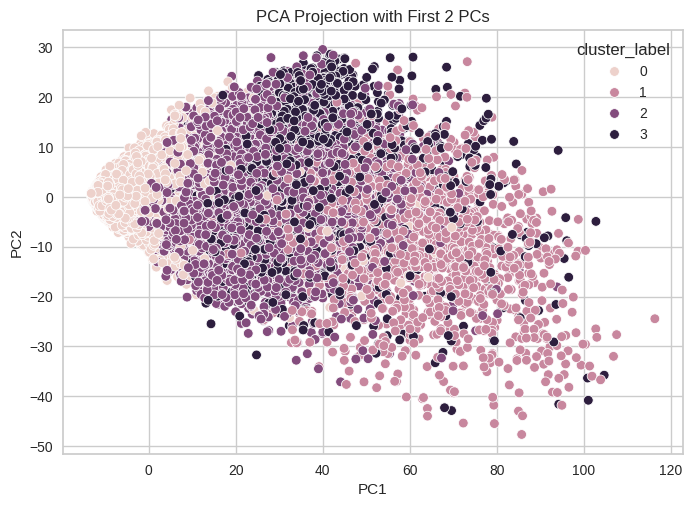

In [8]:
Z1 = nPCA.transform(df_scaled)
sns.scatterplot(x=Z1[:, 0], y=Z1[:, 1], hue=df_pd["cluster_label"])

plt.title('PCA Projection with First 2 PCs')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### iii. Calculating average of first 3 components

In [9]:
df_pca = pd.DataFrame(Z1, columns=["PC1", "PC2", "PC3", "PC4"])
df_pca["cluster_label"] = cluster_labels

cluster_summary = df_pca.groupby("cluster_label")[["PC1", "PC2", "PC3"]].mean().reset_index()
print(cluster_summary)

   cluster_label        PC1       PC2       PC3
0              0  -6.990197 -0.047064  0.387251
1              1  56.503350 -8.469692 -1.159874
2              2  14.717631  0.011871  0.269391
3              3  30.091164  4.520622 -7.179902


In this interpretation, PC1 indicates _, PC2 indicates _, and PC3 indicates _.

For cluster 0, it has a _ PC1 which likely indicates _. It also has a _ PC2 which may indicate _. Lastly, it has a _ PC2 which suggests _. Considering these details, the cluster's name is _.

For cluster 1, it has a _ PC1 which likely indicates _. It also has a _ PC2 which may indicate _. Lastly, it has a _ PC2 which suggests _. Considering these details, the cluster's name is _.

For cluster 2, it has a _ PC1 which likely indicates _. It also has a _ PC2 which may indicate _. Lastly, it has a _ PC2 which suggests _. Considering these details, the cluster's name is _.

For cluster 3, it has a _ PC1 which likely indicates _. It also has a _ PC2 which may indicate _. Lastly, it has a _ PC2 which suggests _. Considering these details, the cluster's name is _.

### d. UMAP

/home/thomson/DS3000Project/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP(angular_rp_forest=True, low_memory=False, metric='cosine', min_dist=0.3, n_epochs=1000, n_neighbors=30, verbose=True)
Fri Apr 11 16:06:34 2025 Construct fuzzy simplicial set
Fri Apr 11 16:06:34 2025 Finding Nearest Neighbors
Fri Apr 11 16:06:34 2025 Building RP forest with 20 trees
Fri Apr 11 16:06:40 2025 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	 5  /  16
	 6  /  16
	Stopping threshold met -- exiting after 6 iterations
Fri Apr 11 16:06:59 2025 Finished Nearest Neighbor Search
Fri Apr 11 16:07:01 2025 Construct embedding


Epochs completed:   0%|            0/1000 [00:00]

	completed  0  /  1000 epochs
	completed  100  /  1000 epochs
	completed  200  /  1000 epochs
	completed  300  /  1000 epochs
	completed  400  /  1000 epochs
	completed  500  /  1000 epochs
	completed  600  /  1000 epochs
	completed  700  /  1000 epochs
	completed  800  /  1000 epochs
	completed  900  /  1000 epochs
Fri Apr 11 16:07:30 2025 Finished embedding


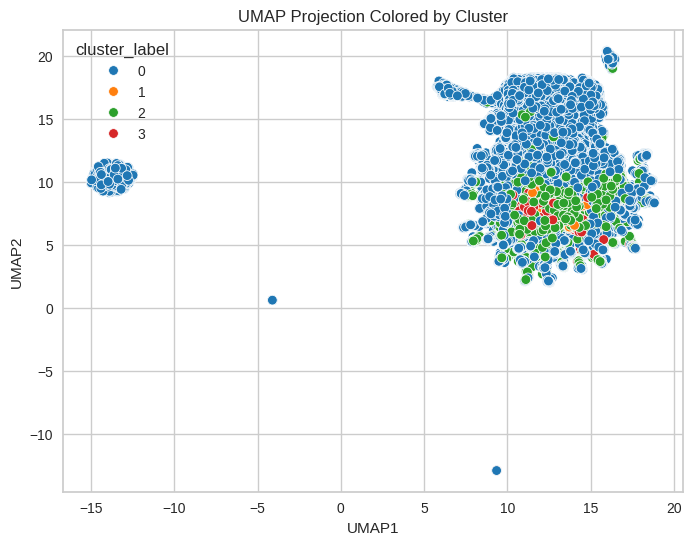

In [10]:
reducer = umap.UMAP(n_neighbors=30,
                    n_components= 2,
                    metric='cosine',
                    n_epochs=1000,
                    min_dist=0.3,
                    spread=1.0,
                    low_memory=False,
                    n_jobs=-1,
                    verbose=True)

# Now we train and calculate the embedding!
UMAP_embedding = reducer.fit_transform(df_scaled)
df_umap = pd.DataFrame(UMAP_embedding, columns=["UMAP1", "UMAP2"])

df_umap["cluster_label"] = cluster_labels

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="cluster_label", data=df_umap, palette="tab10")
plt.title("UMAP Projection Colored by Cluster")
plt.grid(True)
plt.show()